In [1]:
import torch_geometric.explain as ex

In [2]:
import torch
from graph_class_gnn import Graph_Classification_GCN
model = Graph_Classification_GCN()
model.load_state_dict(torch.load('model/pgexp_model_red_ratio.pt'))


<All keys matched successfully>

In [3]:
explainer = ex.Explainer(
        model=model,
        algorithm=ex.PGExplainer(epochs=5, lr=0.003),
        explanation_type='phenomenon',
        edge_mask_type='object',
        model_config=ex.ModelConfig(mode="multiclass_classification", task_level="graph", return_type="raw"),
    )

In [4]:
datasetLoader = torch.load('model/pgexp_test_loader_red_ratio.pt')


In [5]:
dataset = datasetLoader.dataset


In [6]:
len(dataset)

8000

In [7]:

for epoch in range(5):
    #print epochs
    print('Epoch:', epoch)
    for i in range(len(dataset)):
        explainer.algorithm.train(model=model,x=dataset[i].x, edge_index=dataset[i].edge_index,target=dataset[i].y, epoch=epoch)

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4


In [8]:
expl1 =explainer(dataset[4].x,dataset[4].edge_index, target=dataset[4].y)

In [18]:
# convert dataset.y to y numpy array
import numpy as np
y = [data.y for data in dataset]
classes = np.unique(y)

In [19]:
import matplotlib.pyplot as plt

In [20]:
class_indexes = []
for c in classes:
    class_indexes.append(np.where(y == c)[0])

In [21]:
class_indexes

[array([   1,    3,    4, ..., 7996, 7998, 7999]),
 array([   0,    2,    5, ..., 7991, 7995, 7997])]

In [ ]:
for example in range(5):    
        for c in classes: 
            index = class_indexes[c][example]
            print(index)

In [24]:
torch.save(explainer, 'outputs/pgexp_expl1_red_ratio.pt')

tensor([[0],
        [0]])
tensor([[0., 1., 0.]])
Explanation(edge_mask=[1], target=[1], x=[1, 3], edge_index=[2, 1])


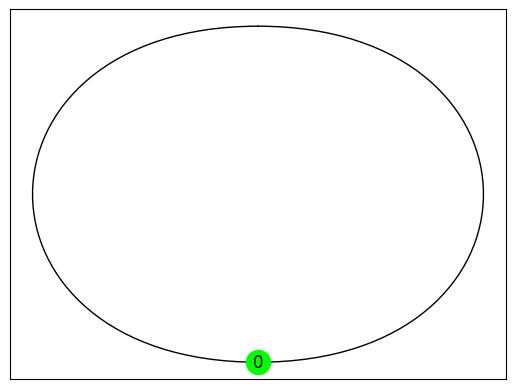

In [11]:
print(expl1.edge_index)
print(expl1.x)
print(expl1)
import utility_functions as uf
uf.printGraph(expl1)
plt.savefig("outputs/test.png")